In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [2]:
import os

path = os.listdir("C:/Users/acer/Desktop/CAPSTONE/training")

classes = {'NORTH':0, 'SOUTH':1, 'EAST':2, 'WEST':3}

In [3]:
import cv2

X=[]
Y=[]

for cls in classes:
    pth = "C:/Users/acer/Desktop/CAPSTONE/training/" + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth +'/'+ j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.unique(Y)

array([0, 1, 2, 3])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

0    177
2    122
1    101
3     49
Name: count, dtype: int64

In [7]:
X[4].shape

(200, 200)

In [8]:
X.shape

(449, 200, 200)

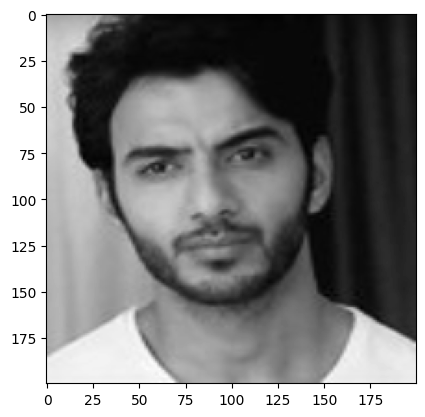

In [9]:
plt.imshow(X[2], cmap = 'gray')

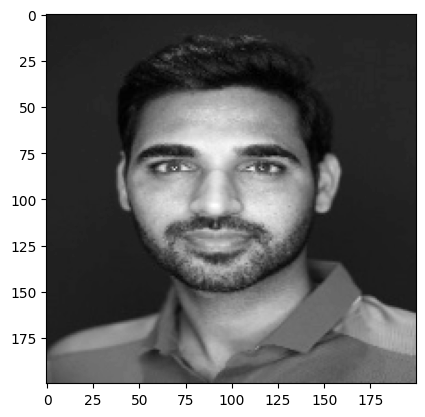

In [10]:
plt.imshow(X[89], cmap = 'gray')

In [11]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(449, 40000)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state= 2, test_size= 0.2)
print(xtrain.shape)
print(xtest.shape)

(359, 40000)
(90, 40000)


In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
#pca_train = xtrain
#pca_test = xtest

(359, 40000) (90, 40000)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
lg = LogisticRegression(C = 0.1)
lg.fit(pca_train, ytrain)

c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [18]:
svc = SVC( )
svc.fit(pca_train, ytrain)

SVC()

In [19]:
print("training score:", lg.score(pca_train, ytrain))
print("testing score:", lg.score(pca_test, ytest))

training score: 1.0
testing score: 0.3111111111111111


In [20]:
print("training score:", svc.score(pca_train, ytrain))
print("testinig score:", svc.score(pca_test, ytest))

training score: 0.6768802228412256
testinig score: 0.4222222222222222


In [21]:
pred = svc.predict(pca_test)
np.where(ytest != pred)

(array([ 4,  5,  7,  8,  9, 10, 11, 14, 15, 16, 17, 19, 21, 23, 24, 25, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 40, 42, 43, 45, 47, 49, 50, 51, 56,
        57, 58, 61, 63, 64, 66, 67, 68, 69, 73, 75, 77, 78, 79, 81, 84, 87,
        89], dtype=int64),)

In [22]:
pred[0], pred[1]

(0, 0)

In [23]:
ytest[0], ytest[1]

(0, 0)

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Evaluate the Logistic Regression model
lg_pred = lg.predict(pca_test)

lg_accuracy = accuracy_score(ytest, lg_pred)
lg_f1 = f1_score(ytest, lg_pred, average='weighted')
lg_recall = recall_score(ytest, lg_pred, average='weighted')
lg_precision = precision_score(ytest, lg_pred, average='weighted')
lg_confusion_matrix = confusion_matrix(ytest, lg_pred)

print("Logistic Regression Results:")
print("Accuracy:", lg_accuracy)
print("F1 Score:", lg_f1)
print("Recall:", lg_recall)
print("Precision:", lg_precision)
print("Confusion Matrix:")
print(lg_confusion_matrix)

# Evaluate the Support Vector Machine (SVC) model
svc_pred = svc.predict(pca_test)

svc_accuracy = accuracy_score(ytest, svc_pred)
svc_f1 = f1_score(ytest, svc_pred, average='weighted')
svc_recall = recall_score(ytest, svc_pred, average='weighted')
svc_precision = precision_score(ytest, svc_pred, average='weighted')
svc_confusion_matrix = confusion_matrix(ytest, svc_pred)

print("\nSupport Vector Machine (SVC) Results:")
print("Accuracy:", svc_accuracy)
print("F1 Score:", svc_f1)
print("Recall:", svc_recall)
print("Precision:", svc_precision)
print("Confusion Matrix:")
print(svc_confusion_matrix)


Logistic Regression Results:
Accuracy: 0.3111111111111111
F1 Score: 0.3022507113283765
Recall: 0.3111111111111111
Precision: 0.302053872053872
Confusion Matrix:
[[18  5  6  6]
 [ 9  4  5  1]
 [10  6  6  4]
 [ 7  0  3  0]]

Support Vector Machine (SVC) Results:
Accuracy: 0.4222222222222222
F1 Score: 0.30246429815395326
Recall: 0.4222222222222222
Precision: 0.40027434842249654
Confusion Matrix:
[[34  0  1  0]
 [16  2  1  0]
 [23  1  2  0]
 [ 8  0  2  0]]


c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
svc_pred = svc.predict(pca_test)

svc_accuracy = accuracy_score(ytest, svc_pred)
svc_f1 = f1_score(ytest, svc_pred, average='weighted')
svc_recall = recall_score(ytest, svc_pred, average='weighted')
svc_precision = precision_score(ytest, svc_pred, average='weighted')
svc_confusion_matrix = confusion_matrix(ytest, svc_pred)

print("\nSupport Vector Machine (SVC) Results:")
print("Accuracy:", svc_accuracy)
print("F1 Score:", svc_f1)
print("Recall:", svc_recall)
print("Precision:", svc_precision)
print("Confusion Matrix:")
print(svc_confusion_matrix)


Support Vector Machine (SVC) Results:
Accuracy: 0.4222222222222222
F1 Score: 0.30246429815395326
Recall: 0.4222222222222222
Precision: 0.40027434842249654
Confusion Matrix:
[[34  0  1  0]
 [16  2  1  0]
 [23  1  2  0]
 [ 8  0  2  0]]


c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


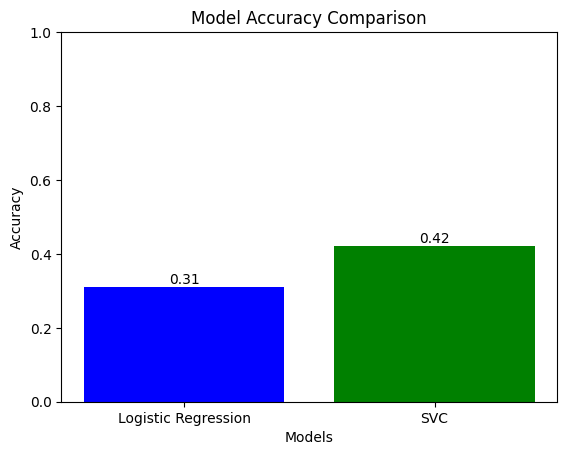

In [26]:
import matplotlib.pyplot as plt


accuracies = [lg_accuracy, svc_accuracy]
models = ['Logistic Regression', 'SVC']

# Create a bar plot
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  


for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.show()


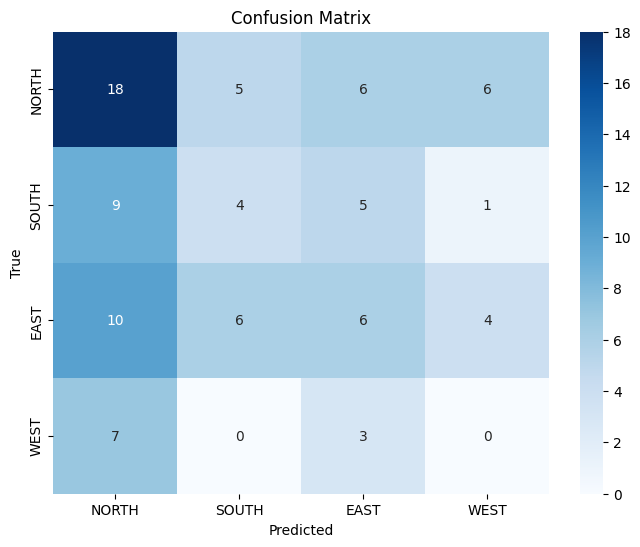

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Replace these with the actual predictions from your model (e.g., lg_pred or svc_pred)
predictions = lg_pred  # Change this to your model's predictions
true_labels = ytest

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes.keys(), yticklabels=classes.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
